In [132]:
# Image Compression 

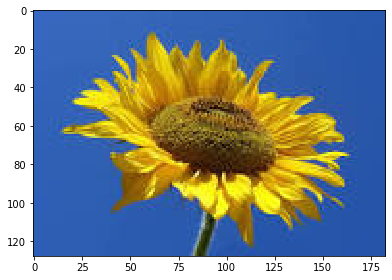

D:\Anaconda\lib\site-packages\sklearn\manifold\_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


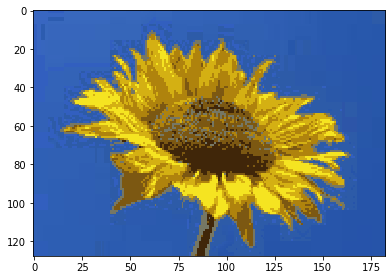

In [136]:
from skimage import io
from sklearn.cluster import SpectralClustering
import numpy as np

# Read the image
image = io.imread('download.jpeg')
io.imshow(image)
io.show()

# Dimension of the original image
rows = image.shape[0]
cols = image.shape[1]

# Flatten the image
image = image.reshape(rows * cols, 3)

# Implement spectral clustering to form k clusters
n_clusters = 64  # Number of clusters
sc = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', assign_labels='kmeans')
quantized_labels = sc.fit_predict(image)

# Compute cluster centers
cluster_centers = np.array([image[quantized_labels == i].mean(axis=0) for i in range(n_clusters)])

# Replace each pixel value with its nearby cluster centroid
compressed_image = cluster_centers[quantized_labels]
compressed_image = np.clip(compressed_image.astype('uint8'), 0, 255)

# Reshape the image to the original dimension
compressed_image = compressed_image.reshape(rows, cols, 3)

# Save and display the output image
io.imsave('comp6.png', compressed_image)
io.imshow(compressed_image)
io.show()
